Anjali  K A

22070126011

AIML A1


#Importing the necessary libraries

#Initilaizing the environment

In [4]:
import numpy as np                     # numerical computations
import matplotlib.pyplot as plt        # plotting images and graphs
from envs import Maze                  # custom Maze environment
from utils import plot_policy, plot_action_values, test_agent  # Importing utility functions

/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

In [5]:
env = Maze()  # Initializing the Maze environment

/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


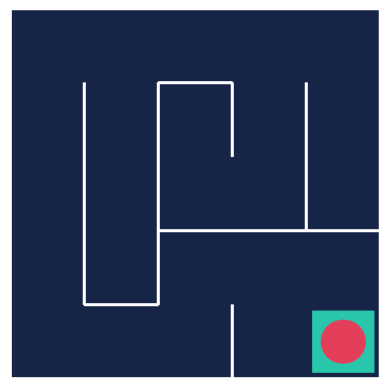

In [6]:
frame=env.render(mode='rgb_array')
plt.axis("off")
plt.imshow(frame)
#Displaying the maze

In [8]:
print(f"Observation space shape: {env.observation_space.nvec}")  # Shape of state space
print(f"Number of actions: {env.action_space.n}")                # Total actions available

Observation space shape: [5 5]
Number of actions: 4


#Defining the value table Q(s,a)

###Create the Q(s,a) table

In [9]:
action_values = np.zeros(shape=(5, 5, 4))  # Initialize action-value table for 5x5 grid with 4 actions

###Plot Q(s,a)

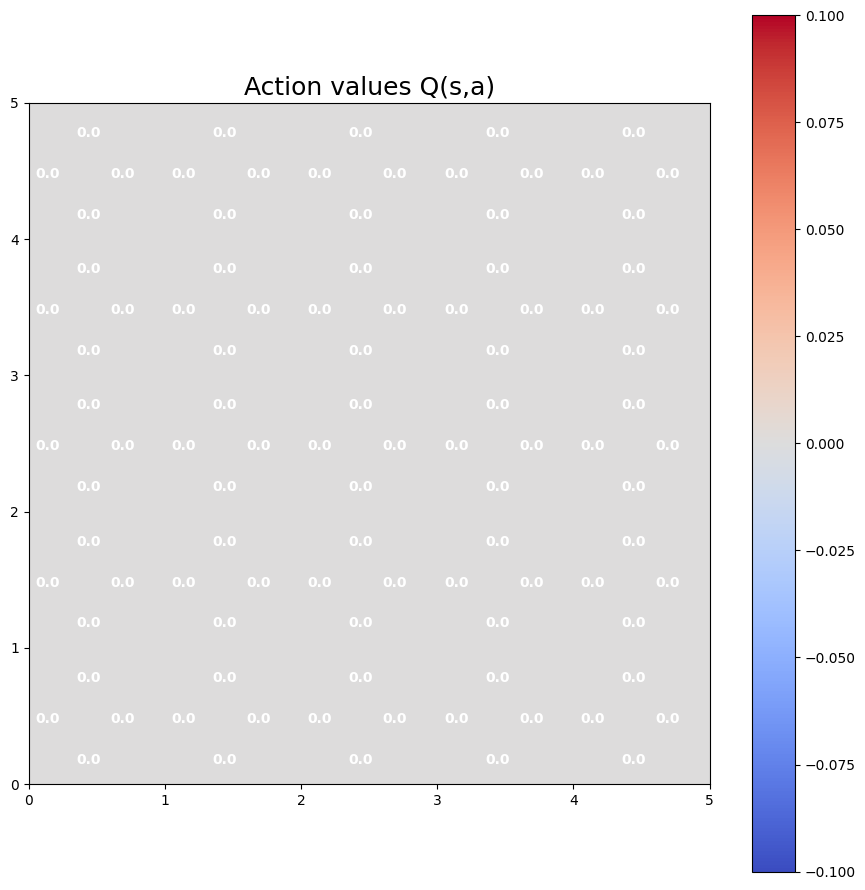

In [10]:
# Visualize the action values.
plot_action_values(action_values)

###Create the policy pi

In [11]:
# epsilon: exploration factor
def policy(state, epsilon=0.):
  if np.random.random() < epsilon:
    return np.random.randint(4)  # Explore: select random action
  else:
    av = action_values[state]  # Exploit: select the action with the highest value
    return np.random.choice(np.flatnonzero(av == av.max()))  # Break ties randomly

###Test the policy with state(0,0)

In [12]:
action=policy((0,0),0.2)
print(f"Action taken in state(0,0): {action}")
#random selection so values will be different

Action taken in state(0,0): 0


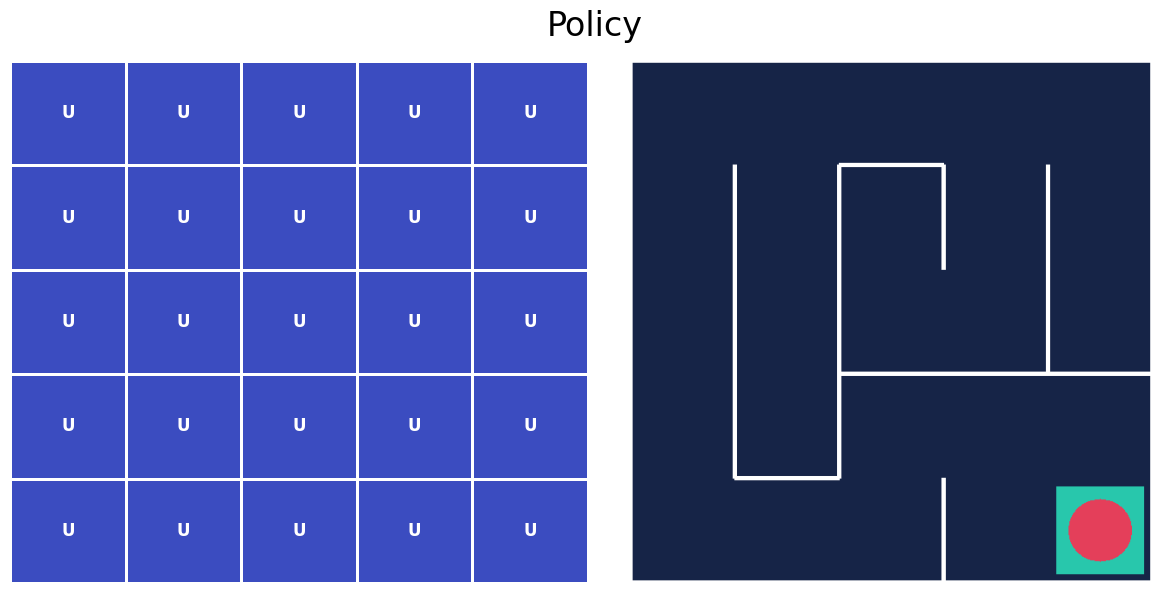

In [14]:
np.object=object
plot_policy(action_values,frame) # Plot the policy based on the action values for each state.

In [15]:
# On-Policy Monte Carlo Control: Update action-values using returns from episodes.
# policy: the action selection policy
# action_values: action-value function to be updated
# episodes: number of episodes to run the control
# gamma: discount factor for future rewards
# epsilon: exploration factor for epsilon-greedy policy

def on_policy_mc_control(policy, action_values, episodes, gamma=0.99, epsilon=0.2):
  sa_returns = {}  #store returns for state-action pairs

  for episode in range(1, episodes + 1):
    state = env.reset()
    done = False
    transitions = []  # Store state, action, reward transitions

    while not done:
      action = policy(state, epsilon)  # Choose action using policy
      next_state, reward, done, _ = env.step(action)  # Take action and observe outcome
      transitions.append([state, action, reward])  # Store transition
      state = next_state

    G = 0  # Initialize return
    for state_t, action_t, reward_t in reversed(transitions):  # Traverse transitions in reverse
      G = reward_t + gamma * G  # Update return

      # Store the return for the state-action pair
      if not (state_t, action_t) in sa_returns:
        sa_returns[(state_t, action_t)] = []

      sa_returns[(state_t, action_t)].append(G)
      action_values[state_t][action_t] = np.mean(sa_returns[(state_t, action_t)])  # Update action value


In [16]:
on_policy_mc_control(policy,action_values, episodes=1000) # Run On-Policy Monte Carlo Control

#Show results

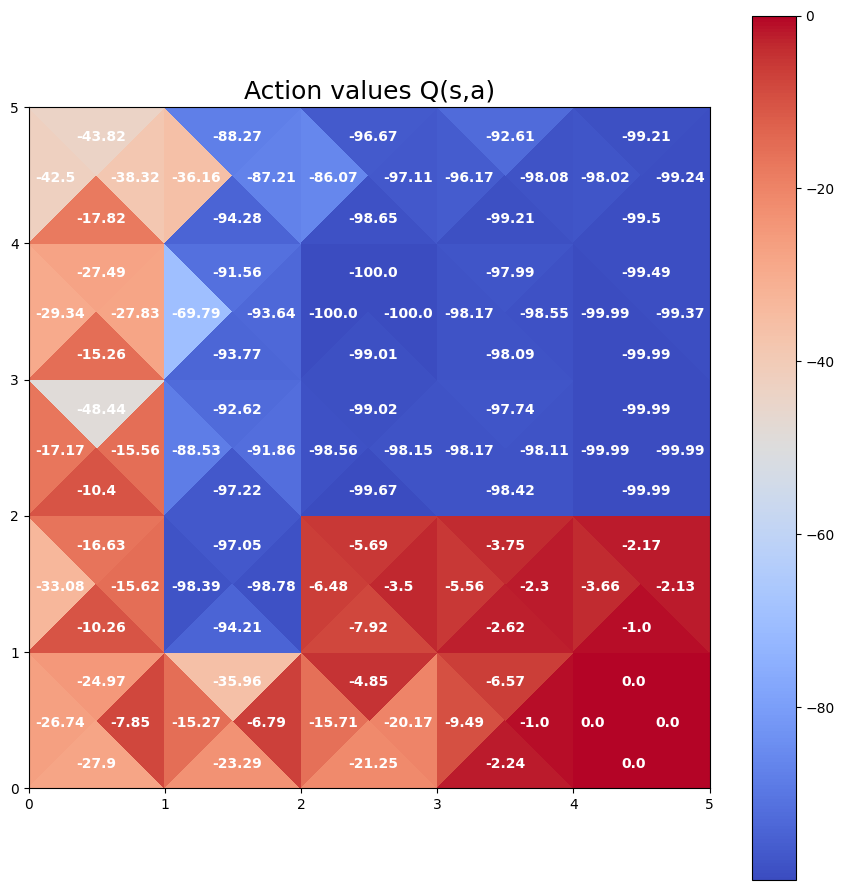

In [17]:
plot_action_values(action_values)

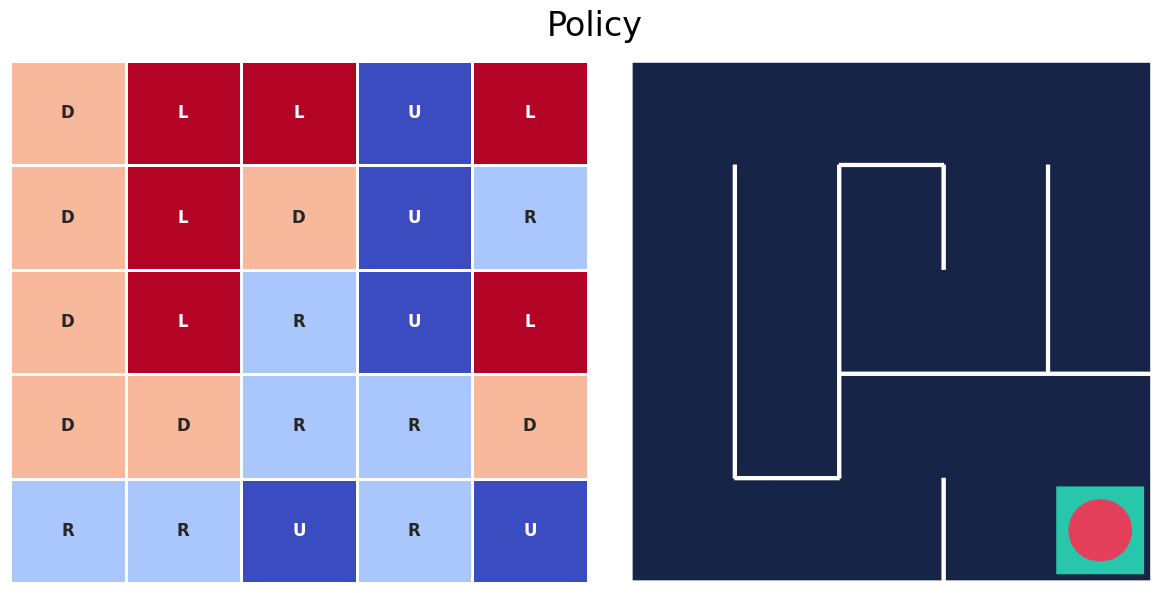

In [18]:
plot_policy(action_values,frame)

###Test the resulting agent

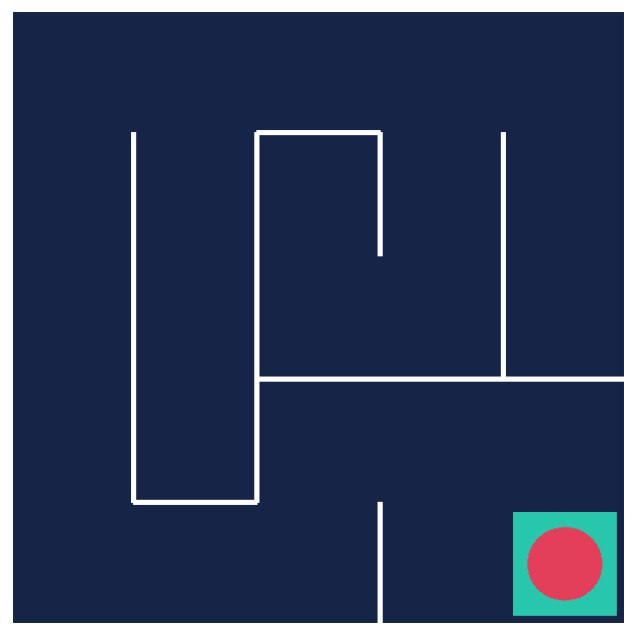

In [19]:
test_agent(env,policy,episodes=5)